<a href="https://colab.research.google.com/github/Pilarppk/SIM_YAC_PARRALES_UPSE2023/blob/main/explicto%20e%20implicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

explicito


In [2]:

import numpy  as np
import math

In [10]:
L=30000
dx=15000
Tiempo=100000
DT=1
K=50 #Permeabilidad MD
por=0.5
vis=1 # centipoise
Beta=0.7
CompTotal=1.2**(-6) #ps1-1
A=200000#ft^2


In [12]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta


1.3271039999999997e-06

In [13]:
#Esquema Explicito
def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-(2*P1)+P2)
  return(Pdt)

Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2))


In [15]:
#Condiciones inicialea
Pyac=7000
Piz=2000
Pder=0
Pin=np.ones((L//dx)+2)
Pres=np.zeros((L//dx)+2)
Pres2=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=2*Piz-Pin[1]
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]

Pin.shape

(4,)

In [16]:
len(Pin)
Pexplicita.shape


(100000, 4)

In [19]:
t=DT
Pexplicita[0]=Pin
while t<Tiempo:
  for i in range(0,len(Pin)-1):
    if i==0:
      Pres[i]=2*Piz-Pin[1]
    elif i==len(Pin)-1:
      Pres[i]=2*Pder-Pin[len(Pin)-2]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//DT]=Pres
  t=t+DT
  Pin=Pres

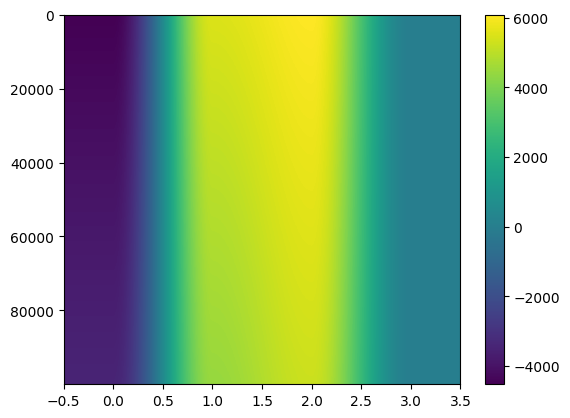

In [20]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

implicito

In [ ]:
#Esquema Implicito
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2))

Pin=np.ones((L//dx)+2)
Pres=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2
Matriz_resolucion=np.zeros([N-2,N-2])

In [ ]:
for i in range(N-2):
  Matriz_resolucion[i,i]=1+2*Eta
  if i>0:
    Matriz_resolucion[i,i-1]=-Eta
  if i<(N-3):
    Matriz_resolucion[i,i+1]=-Eta

In [ ]:
Matriz_resolucion2=np.zeros_like(Matriz_resolucion)
for i in range(0,N-3):
  Matriz_resolucion2[i,i]=1+2*Eta
  if i>0:
    Matriz_resolucion2[i,i-1]=-Eta
  if i<(N-4):
    Matriz_resolucion2[i,i+1]=-Eta

Matriz_resolucion2[1,1] =1+3*Eta
Matriz_resolucion2[N-3,N-3] =1+Eta
Pin[1]=2*Eta*Piz


In [ ]:
Pcal=np.zeros([N-2])
Pcal=np.linalg.solve(Matriz_resolucion2,Pin[1:-1])

In [ ]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))
Pres

In [ ]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion2,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()

Ecuacion de la difusividad

In [1]:
import numpy as np #biblioteca
import math



In [2]:
L=1000 #distancia total
dx=50 #delta x
Distance=np.arange(0,L+1,dx) #Crear un vector de las distancias
P01=np.ones_like(Distance) #Vector inical de Presiones
print(P01) #imprimir vector P01

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [3]:
#datos del yacimiento
PYac=1000 #presion del yacimiento
PFrontd=0 #Frontera derecha
PFronti=0 #Frontera izquierda
Tiempo=400000 #tiempo total
DT=1000 #delta t
VectorTiempo=np.arange(0,math.floor(Tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
Pdt=np.zeros_like(Distance)

In [5]:
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
print(PXX)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


ESTE es el primer  ejercicio


In [ ]:
Dx=100
dt=10


In [ ]:
a=lambda x,z:z-x

In [ ]:
a(4,1)

-3